# 第六次作业

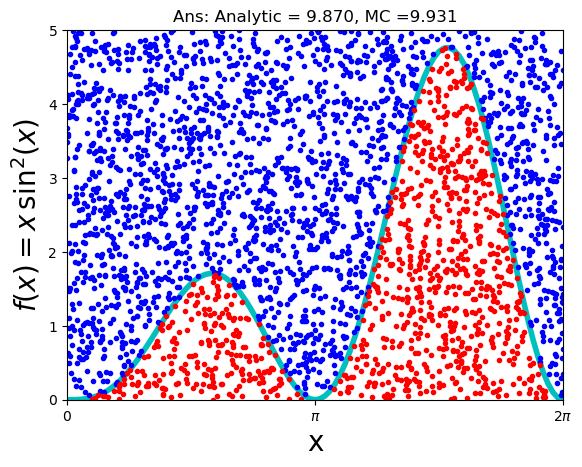

In [1]:
#PondMatPlot.py: Monte Carlo integration via vonNeumann rejection

import numpy as np
import matplotlib.pyplot as plt

N=100                                            # # points
x1=np.arange(0,2*np.pi+2*np.pi/N,2*np.pi/N)      # x values
fig,ax=plt.subplots()
y1=x1*np.sin(x1)**2                              # integrand
ax.plot(x1,y1,'c',lw=4)                          # integrand in cyan
ax.set_xlim((0,2*np.pi))                         # limits x axis
ax.set_ylim((0,5))                               # for y axis
ax.set_xticks([0,np.pi,2*np.pi])                 # set 3 x axis tics
ax.set_xticklabels(['0','$\pi$','2$\pi$'])       # name 3 tics
ax.set_xlabel('x',fontsize=20)
ax.set_ylabel('$f(x)=x\,\sin^2(x)$',fontsize=20)
fig.patch.set_visible(False)
xi=[]
yi=[]
xo=[]
yo=[]                                           # Inner & outer pts
def fx (x):                                     # integrand
    return x*np.sin(x)**2
j=0                                             # counter for inside
Npts=3000
analyt=np.pi**2                                 # analytic answer
xx=2.*np.pi*np.random.rand(Npts)                # 0=< x =< 2pi
yy=5*np.random.rand(Npts)                       # 0=< y 0< 5
for i in range (1,Npts):
    if(yy[i]<=fx(xx[i])):                       # below curve
        xi.append(xx[i])
        yi.append(yy[i])
        j+= 1                                   # increase count
    else:
        xo.append(xx[i])
        yo.append(yy[i])
boxarea = 2.*np.pi*5                        # Box area
area = boxarea*j/(Npts-1)                # area under curve
ax.plot(xo,yo,'bo',markersize=3)
ax.plot(xi,yi,'ro',markersize=3)
ax.set_title('Ans: Analytic = %5.3f, MC =%5.3f'%(analyt,area))
plt.show()

## 题一：绘制10维蒙卡积分的误差随撒点数的关系:

###### $$f(x)=\int_{0}^{1} \int_{0}^{1} \int_{0}^{1} \int_{0}^{1} \int_{0}^{1} \int_{0}^{1} \int_{0}^{1} \int_{0}^{1} \int_{0}^{1} \int_{0}^{1} \sum_{i}^{10} {x[i]}^2 \,dx1  \,dx2  \,dx3  \,dx4  \,dx5  \,dx6  \,dx7  \,dx8  \,dx9  \,dx10 $$

## 题二：

### 修改Listing 6.1代码中计算导数的部分为autograd，并求解该静力学平衡问题。

### $$L^1*\cos \theta^1 +L^2*\cos \theta^2 +L^3*\cos \theta^3 =L$$
### $$L^1*\sin \theta^1 +L^2*\sin \theta^2 -L^3*\sin \theta^3 =0$$
### $$\sin^2 \theta^1+\cos^2 \theta^1=1$$
### $$\sin^2 \theta^2+\cos^2 \theta^2=1$$
### $$\sin^2 \theta^3+\cos^2 \theta^3=1$$
### $$T^1*\sin \theta^1 -T^2*\sin \theta^2 -W^1 =0$$
### $$T^1*\cos \theta^1 -T^2*\cos \theta^2 =0$$
### $$T^2*\sin \theta^2 +T^3*\sin \theta^3 -W^2 =0$$
### $$T^2*\cos \theta^2 -T^3*\cos \theta^3 =0$$

## 采用numpy的画图

In [13]:
import numpy as np
from vpython import *
from numpy.linalg import solve
import autograd
import torch
from torch. autograd. functional import jacobian

scene = canvas(x=0, y=0, width=500, height=500, title='string and masses configuration' )
tempe = curve(x=range(0, 500), color=color . black)
n=9
eps = 1e-3
deriv = np.zeros((n, n), float)
f = np.zeros((n), float)
x1 = np.array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 1., 1.] )
X = torch.tensor([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 1., 1. ], requires_grad=True)

def plotconfigl():
    for obj in scene.objects:  
        obj.visible=0
L1 = 3.0
L2= 4.0
L3= 4.0
xa=L1*x1[3] 
ya = L1 * x1[0]
xb = xa + L2 * x1[4]
yb = ya + L2 * x1[1]
xc = xb + L3 * x1[5]
yc = yb - L3 * x1[2]
mx = 100.0
bx= -500.0 
my=-100.0
by = 400.0
xap = mx*xa + bx
yap = my *ya + by
ball1 = sphere(pos=vector(xap, yap,0),color=color.cyan, radius=15) 
xbp = mx * xb + bx
ybp = my *yb + by
ball2 = sphere(pos=vector(xbp, ybp,0),color=color.cyan, radius=25)
xcp=mx * xc + bx
ycp=my*yc+by
x0=mx*0+ bx
y0 = my*0+ by
line1 = curve (pos=[vector(x0, y0, 0), vector(xap, yap, 0)], color=color. yellow, radius=4)
line2 = curve(pos=[vector(xap, yap, 0), vector(xbp, ybp, 0)], color=color . yellow, radius=4)
line3 = curve (pos=[vector(xbp, ybp, 0), vector(xcp, ycp, 0)], color=color. yellow, radius=4)
topline = curve (pos= [vector(x0, y0, 0), vector(xcp, ycp, 0)], color=color .red, radius=4)

def fun(x):
    f = torch.tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., ])
    f[0]=3*x[3]+4*x[4]+4*x[5]-8.0
    f[1]=3*x[0]+ 4* x[1]- 4*x[2]
    f[2]=x[6]*x[0]-x[7]*x[1]-10.0
    f[3]=x[6] * x[3] - x[7] * x[4]
    f[4]=x[7]*x[1]+x[8]*x[2]-20.0
    f[5]=x[7] * x[4] - x[8] * x[5]
    f[6]=pow(x[0], 2) + pow(x[3], 2) - 1.0
    f[7]=pow(x[1], 2) + pow(x[4], 2) - 1.0
    f[8]=pow(x[2], 2) + pow(x[5], 2) - 1.0
    return f
y= fun(X)
torch.ones_like(y) @ jacobian(fun, X)
print(torch.ones_like(y))
print(jacobian(fun, X))
def dfi_dxj(x, deriv, n): # 求偏导
    var = jacobian(fun, x) .numpy()
    for i in range(n):
        for j in range(n):
            deriv[i][j] = var[i][j]
dfi_dxj(x,deriv,n)
print(deriv)

<IPython.core.display.Javascript object>

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1.])
tensor([[ 0.0000,  0.0000,  0.0000,  3.0000,  4.0000,  4.0000,  0.0000,  0.0000,
          0.0000],
        [ 3.0000,  4.0000, -4.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000],
        [ 0.5000, -1.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.5000, -0.5000,
          0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.5000, -1.0000,  0.0000,  0.5000, -0.5000,
          0.0000],
        [ 0.0000,  1.0000,  1.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.5000,
          0.5000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  1.0000, -1.0000,  0.0000,  0.5000,
         -0.5000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000]])
[[ 0.   0.   0.   3.   4.   4.   0.   0.   0. ]
 [ 3. 